<a href="https://colab.research.google.com/github/damianodea/hpc_2025/blob/main/HPQC_HandsOn_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Classification on MNIST dataset, using Neural Networks </font>

Import MNIST

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Check what we imported.

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
test_images.dtype

dtype('uint8')

In [7]:
len(train_labels)

60000

In [8]:
len(test_labels)

10000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's see an example visually:

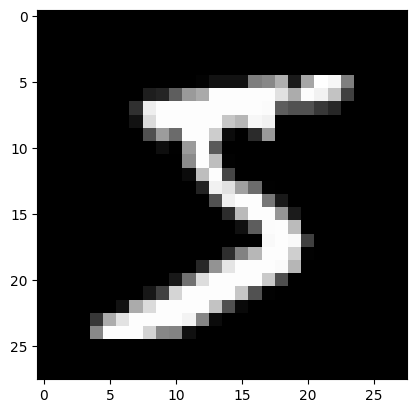

In [11]:
from matplotlib import pyplot as plt
import numpy as np

first_image = train_images[0,:,:]
first_image = np.array(first_image, dtype='float')
plt.imshow(first_image, cmap='gray')
plt.show()

The workflow will be as follows:
1.   we’ll feed the training data, `train_images` and `train_labels`, to the NN. The network will then learn to associate images and labels.
2.   we’ll ask the NN to produce predictions for `test_images`, and we’ll verify whether these predictions match the labels from `test_labels`.

In [ ]:
# the network architecture
from tensorflow.keras import models
from tensorflow.keras import layers
my_network = models.Sequential([
  layers.Dense(100, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(10, activation='softmax')
])

A **layer** is a data-processing module that you can think of as a filter for data. Layers extract *representations* out of the data fed into them.


In this specific case, our NN consists of:

*   a sequence of two `Dense` layers, which are `densely connected` (also called *fully connected*) neural layers
*   the second (and last) layer is a bit special: it is a 10-way `softmax` layer, which will return an array of 10 numbers, our *probability scores* (summing to 1).

To make the network ready for training, we need to pick 3 more things, in the compilation step:

*   A **loss function** (`loss` below)
*   An **optimizer** (`optimizer` below)
*   Some **metrics** (`metrics` below)


In [ ]:
# the compilation step
my_network.compile(optimizer='rmsprop',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval.



In [ ]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

In [ ]:
train_images.dtype

In [ ]:
test_images.shape

In [ ]:
test_images.dtype

Let's print some information about the model. To extract all the parameters, you need to provide the input layer shape.

In [ ]:
my_network.build(train_images.shape) # Input layer shape
my_network.summary()

**<font color='red'>Exercise </font>**: How is the number of parameters (weights) computed?

We’re now ready to train the network, via the `fit` method.

In [ ]:
%%time
# Fit the NN
my_network.fit(train_images, train_labels, epochs=10, batch_size=128)

Two quantities are displayed during training:

*   the loss of the network over the training data
*   the accuracy of the network over the training data.

We quickly reach a high accuracy e.g. 0.98 or 0.99 (98% or 99%) on the training data.

Now let’s check that the model performs well on the test set, too:

In [ ]:
test_loss, test_acc = my_network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

The test set accuracy should turn out to be a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of overfitting.

Being careful to do the training only once and properly, you can comment the fit instruction above, in oprder to esploit the onebelow here, and rerun the notebook from scratch to benefit of pandas superpowers and get a nice viz of the training process.

In [ ]:
import pandas as pd

In [ ]:
%%time
history_callback = my_network.fit(train_images, train_labels, epochs=10, batch_size=128)
pd.DataFrame(history_callback.history).plot()

In [ ]:
test_loss, test_acc = my_network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Let's do some predictions now:

In [ ]:
X_new = test_images[:3]
y_proba = my_network.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    image = image.reshape((28, 28))
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<font color='red'> Exercise </font>: Try to tweak the model's architecture or try other models (SVM, trees) to see if you can have better performances!!